In [15]:
import pandas as pd
import numpy as np
import json
import fnmatch
from IPython.display import clear_output
import warnings
import matplotlib.pyplot as plt
import threading
import math

In [237]:
sensors_meta = {"heart beat":"bad/bad","blood pressure":"bad/bad","water intake":"Good/bad","sleep":"bad/bad","sugar level":"bad/bad","exercise time":"good/bad","mobile usage":"bad/good","calories intake":"bad/bad"}

In [31]:
df = pd.read_json(json.load(open("rules.json")), orient ='records')
df

,normal,low,critical,high,sensor
0,8.0,5.0,3,10,sleep
1,75.0,10.0,0,100,exercise time
2,80.0,58.0,100,120,heart beat
3,120.0,90.0,130,140,blood pressure
4,3.7,1.5,1,5,water intake
5,80.0,70.0,40,125,sugar level
6,3.0,1.0,10,5,mobile usage
7,2000.0,1200.0,100,6000,calories intake


Enter your name jack


welcome to jack


<AxesSubplot: >

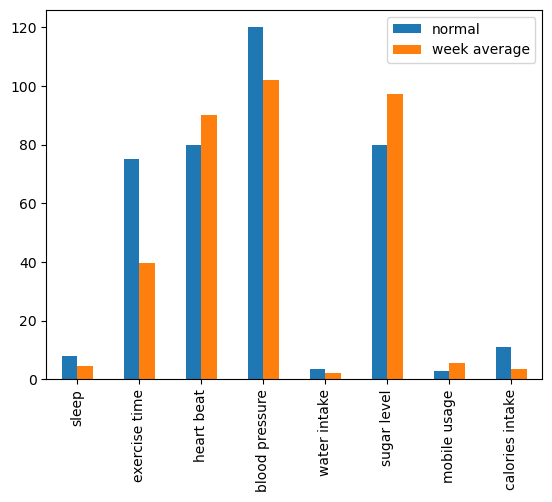

In [305]:
name = input("Enter your name")
data=validate_user(name)

week=pd.DataFrame(data.sort_values(by="date",ascending=False).iloc[0:7,2:].mean(axis=0))
sdata =data.sort_values(by="date",ascending=False).iloc[0:7,:]
week=week.rename(columns={0:"week average"})
week.loc['calories intake',:] = math.log2(week.loc['calories intake',])

tdata =pd.merge(df,week, how='inner', left_index=True, right_index=True)
tdata =tdata[["normal","week average"]]
tdata.loc['calories intake',:]=list(np.log2(np.array(tdata.loc['calories intake',:])))
tdata.plot.bar(rot=90)

In [245]:
def get_stat(sname,val):
    #xxx
    lflag =""
    
    lflag1 =""
    f2 =""
    f3=""
    
    tr = df[df['sensor']==sname]
    exp = round(val/float(tr['normal']) * 100,3)
    flag="decrease"
    if exp>100:
        flag="increase"
        rval = exp-100
    else:
        rval = 100-(exp)
    # # check from low level
  
    mout = sensors_meta[sname].split('/')
    
    if flag=="increase":
        lflag1="high"
        f3=f"looks {mout[0]}"

        if val > float(tr['high']):
            lflag = "higher"
            f2=f"but higher"
        #print("printing here")
        else:
            lfag="lower"
            f2="but lower"
 
    else:
        f3=f"looks {mout[1]}"
        lflag1="low"
        if val > float(tr['low']):
            lflag = "higher"
            f2=" but higher"
            #print(f"printing here{flag}")
        else:
            lfag="lower"
            f2="even lower"
            
             
        
   # print(f"printing here____________________________________________________{flag}")    
    mout = sensors_meta[sname].split('/')
    
   # print(mout)
    
    rtxt = f"it is observed that {sname} is {flag} {rval}%,{f2} than {lflag1} level"
    print(rtxt)
    return flag,rval,rtxt
    

In [306]:
qtxt = input()
final = pd.DataFrame([],columns=["sensor","flag","value"])
for item in tdata.index:
    flag,val,rtxt = get_stat(sname=item,val=tdata.loc[item,'week average'])
    final.loc[len(final.index)] = [item,flag,val]
dfinal=final[final.flag=="decrease"]
ifinal = final[final.flag=="increase"]
cmd= qtxt+", I have increase % of "+','.join(ifinal.sensor)+" by "+','.join(map(str,ifinal.value))+" and decrease "+','.join(dfinal.sensor)+" by "+'.'.join(map(str,dfinal.value))+",respectively"

 I am not feeling well


it is observed that sleep is decrease 44.643%,even lower than low level
it is observed that exercise time is decrease 47.238%, but higher than low level
it is observed that heart beat is increase 12.5%,but lower than high level
it is observed that blood pressure is decrease 15.0%, but higher than low level
it is observed that water intake is decrease 42.085%, but higher than low level
it is observed that sugar level is increase 21.786%,but lower than high level
it is observed that mobile usage is increase 85.714%,but higher than high level
it is observed that calories intake is decrease 99.829%,even lower than low level


In [307]:
cmd

'I am not feeling well, I have increase % of heart beat,sugar level,mobile usage by 12.5,21.786,85.714 and decrease sleep,exercise time,blood pressure,water intake,calories intake by 44.643.47.238.15.0.42.085.99.829,respectively'

<h1 style='color:blue'> Chat GPT </h1>

In [308]:
prompt = cmd

# Generate a response
completion = openai.Completion.create(
    engine=model_engine,
    prompt=prompt,
    max_tokens=1024,
    n=1,
    stop=None,
    temperature=0.5,
)
response = completion.choices[0].text
print(response)

.

It is important to take these changes seriously and to seek medical help if necessary. Make sure to monitor your heart rate and sugar level regularly, and to reduce your mobile usage as much as possible. Additionally, it is important to make sure you are getting enough sleep, exercising regularly, and maintaining a healthy blood pressure. Increasing your water intake and reducing your calories intake can also help improve your overall health.


<h1 style='color:red'> Facebook Opt 2.7 </h1>

In [309]:
from transformers import pipeline
generator = pipeline('text-generation', model="facebook/opt-2.7b",max_length=100, do_sample=True, num_return_sequences=2)
generator(cmd)

[{'generated_text': 'I am not feeling well, I have increase % of heart beat,sugar level,mobile usage by 12.5,21.786,85.714 and decrease sleep,exercise time,blood pressure,water intake,calories intake by 44.643.47.238.15.0.42.085.99.829,respectively. Is this good or I should contact with doctor?I am 45 years old and working as a software engineer. Any suggestions,'},
 {'generated_text': 'I am not feeling well, I have increase % of heart beat,sugar level,mobile usage by 12.5,21.786,85.714 and decrease sleep,exercise time,blood pressure,water intake,calories intake by 44.643.47.238.15.0.42.085.99.829,respectively. What could be the reason that I feel not so well? I am also feeling sick and body ache with cold,fe'}]